In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

In [3]:
años = [2019, 2020, 2021]

quarters = ['Q1', 'Q2', 'Q3', 'Q4']

conceptos=['Convencion_Constitucional',
	'Proceso_Constituyente',
	'Nueva_Constitucion',
	'Convencion_Constituyente']

tweets = pd.DataFrame()

for año in años:
	for quarter in quarters:
		for concepto in conceptos:
			try:
				newtweets = pd.read_csv('datasets/' + str(año) + '/' + concepto + '_' + str(año) + '_' + quarter + '.csv', index_col=1)
				newtweets['archivo'] = concepto + '_' + str(año) + '_' + quarter + '.csv'
				newtweets['keyword'] = concepto
				tweets = pd.concat([tweets, newtweets])
			except:
				print('No se encuentra '+ 'datasets/' + str(año) + '/' + concepto + '_' + str(año) + '_' + quarter + '.csv')

# !! rezagados
for i in [1,2,3,4,5,6]:
	for concepto in conceptos:
		try:
			newtweets = pd.read_csv('datasets/rezagados/rezagados_' + str(i) + '_' + concepto + '.csv', index_col=1)
			newtweets['archivo'] = concepto + '_rezagado_' + str(i) + '.csv'
			newtweets['keyword'] = concepto
			tweets = pd.concat([tweets, newtweets])
		except:
			print('No se encuentra '+ 'datasets/rezagados/rezagados_' + str(i) + '_' + concepto + '.csv')

tweets.shape

No se encuentra datasets/2019/Convencion_Constitucional_2019_Q1.csv
No se encuentra datasets/2019/Proceso_Constituyente_2019_Q1.csv
No se encuentra datasets/2019/Nueva_Constitucion_2019_Q1.csv
No se encuentra datasets/2019/Convencion_Constituyente_2019_Q1.csv
No se encuentra datasets/2019/Convencion_Constitucional_2019_Q2.csv
No se encuentra datasets/2019/Proceso_Constituyente_2019_Q2.csv
No se encuentra datasets/2019/Nueva_Constitucion_2019_Q2.csv
No se encuentra datasets/2019/Convencion_Constituyente_2019_Q2.csv
No se encuentra datasets/2021/Convencion_Constitucional_2021_Q4.csv
No se encuentra datasets/2021/Proceso_Constituyente_2021_Q4.csv
No se encuentra datasets/2021/Nueva_Constitucion_2021_Q4.csv
No se encuentra datasets/2021/Convencion_Constituyente_2021_Q4.csv
No se encuentra datasets/rezagados/rezagados_2_Convencion_Constitucional.csv
No se encuentra datasets/rezagados/rezagados_2_Proceso_Constituyente.csv
No se encuentra datasets/rezagados/rezagados_2_Convencion_Constituyent

(1435265, 20)

In [4]:
tweets = tweets.drop_duplicates(ignore_index=False)
tweets.shape

(1435254, 20)

In [5]:
# parse dates
tweets['date'] = pd.to_datetime(tweets['date'])
tweets['date_day'] = tweets['date'].dt.date.astype('datetime64[ns]')
tweets['date_month'] = tweets['date'].dt.strftime('%Y-%m')
tweets = tweets.sort_values(by='date', ascending=True)

In [6]:
# lista de días entre dos fechas
def lista_dias(fecha_inicio, fecha_fin):

    inicio = datetime.datetime.strptime(fecha_inicio, '%d/%m/%Y')
    fin = datetime.datetime.strptime(fecha_fin, '%d/%m/%Y')

    delta = fin - inicio

    dias = []

    for i in range(delta.days + 1):
        nueva_fecha = inicio + datetime.timedelta(days=i)
        dias.append(nueva_fecha)

    df = pd.DataFrame(dias, columns=['date_day'])

    return df

dias_tweets = lista_dias('01/01/2019', '31/12/2021')
dias_tweets['date_day'] = dias_tweets['date_day']

# merge con lista de días
tweets_por_dia = tweets[['date_day','keyword']].pivot_table(index='date_day', columns='keyword', aggfunc='size')
dias_tweets = dias_tweets.merge(tweets_por_dia, on='date_day', how='left')

dias_tweets.to_csv('datasets/tweets_por_dia.csv')

,date_day,Convencion_Constitucional,Convencion_Constituyente,Nueva_Constitucion,Proceso_Constituyente
0,2019-01-01,NaN,NaN,NaN,NaN
1,2019-01-02,NaN,NaN,NaN,NaN
2,2019-01-03,NaN,NaN,NaN,NaN
3,2019-01-04,NaN,NaN,NaN,NaN
4,2019-01-05,NaN,NaN,NaN,NaN
...,...,...,...,...,...
1091,2021-12-27,NaN,NaN,NaN,NaN
1092,2021-12-28,NaN,NaN,NaN,NaN
1093,2021-12-29,NaN,NaN,NaN,NaN
1094,2021-12-30,NaN,NaN,NaN,NaN


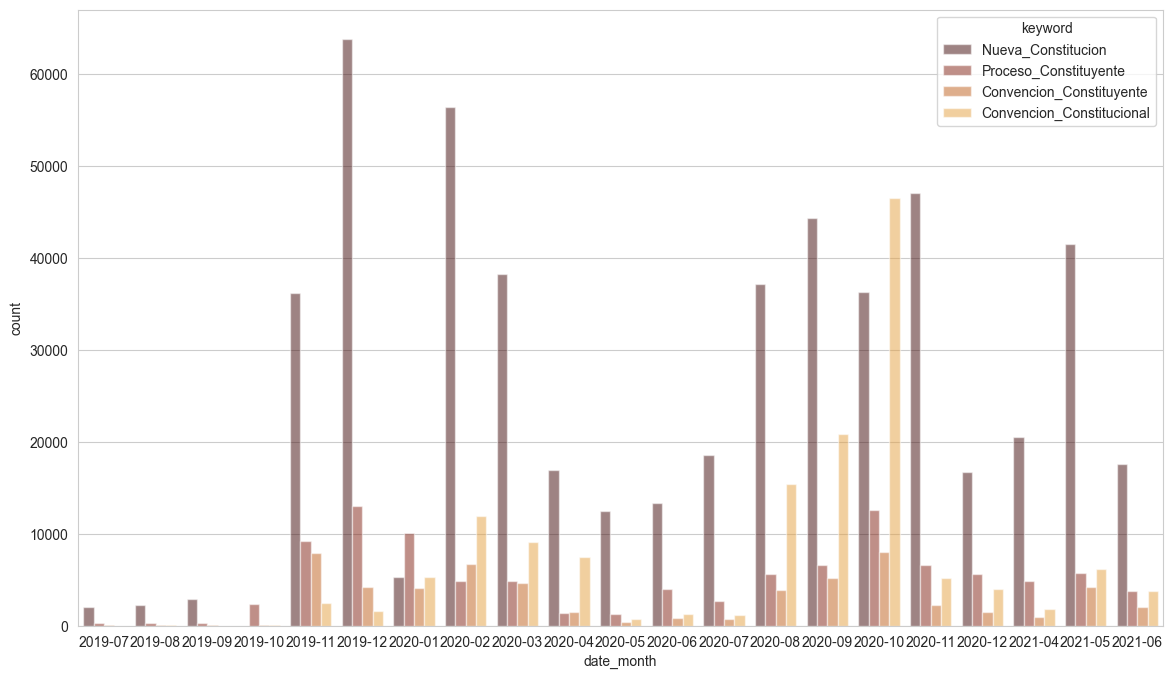

In [67]:
sns.set_style('whitegrid')
sns.set_palette('afmhot')

fig, ax = plt.subplots(figsize=(14, 8))
sns.countplot(x='date_month', data=tweets, ax=ax, alpha=0.5, hue='keyword')
plt.show()

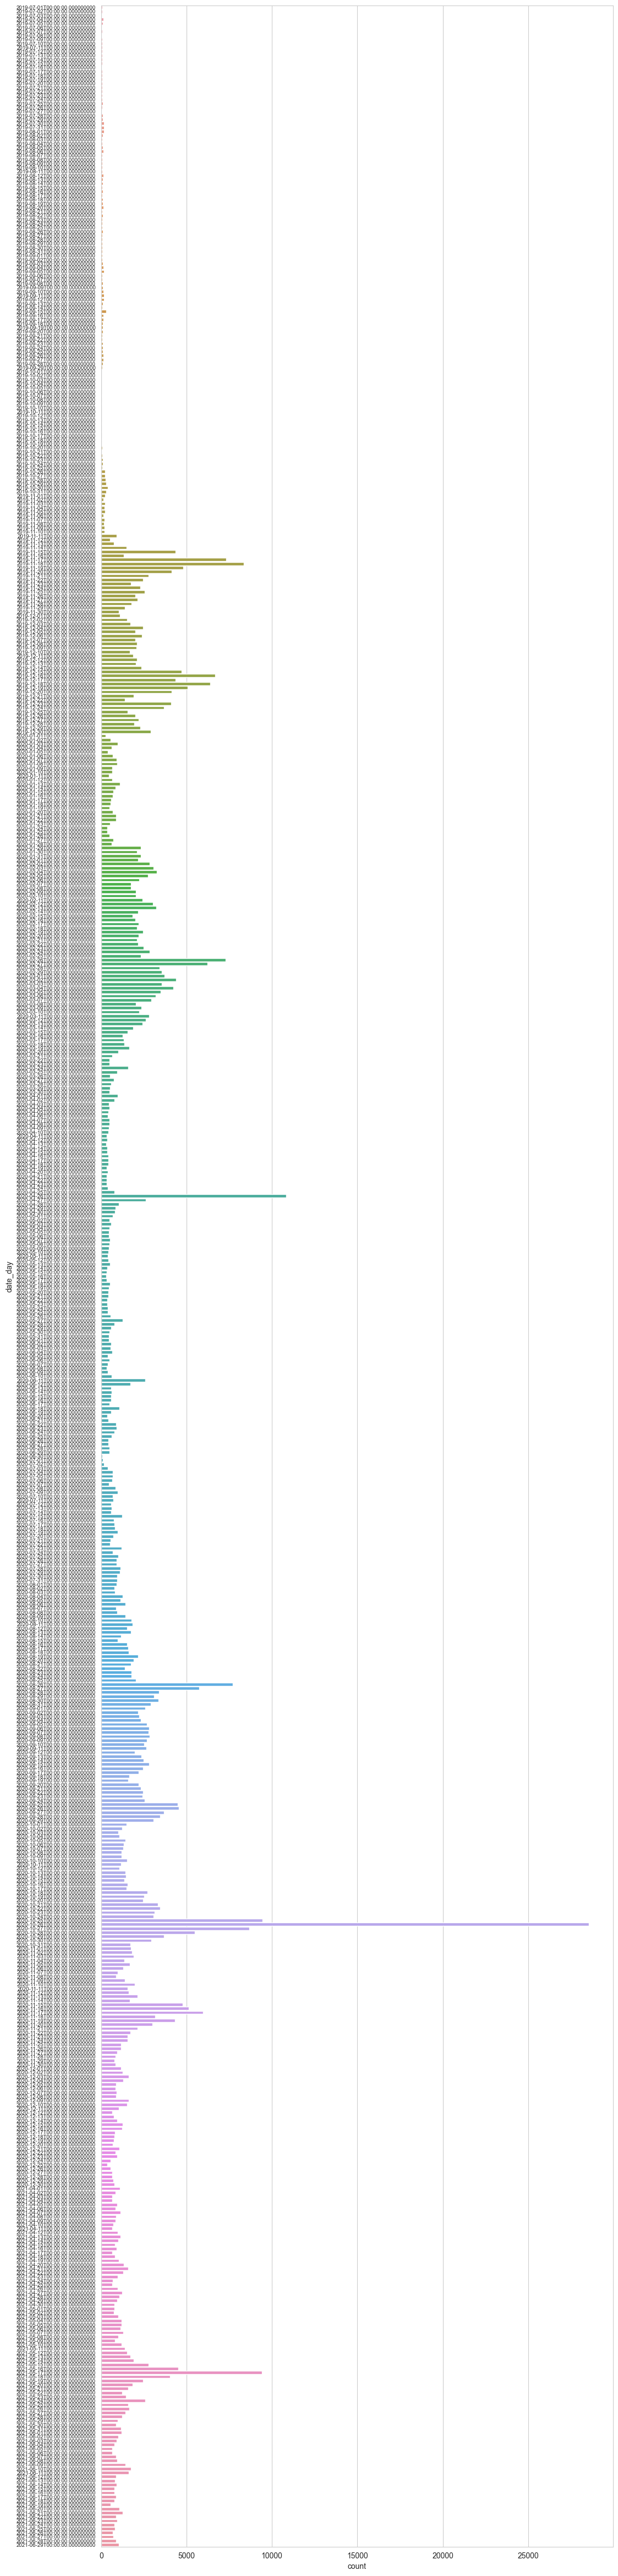

In [68]:

fig, ax = plt.subplots(figsize=(12, 60))
sns.countplot(y='date_day', data=tweets, ax=ax, orient='h')
ax.set_yticklabels(ax.get_yticklabels(), fontsize=7)
plt.show()

In [36]:
hashtags = tweets[tweets['hashtags'].isna() == False]['hashtags']

total_hashtags = []

for i in hashtags:
	i = i.replace('[', '').replace(']', '').replace("'", '').split(', ')
	for j in i:
		total_hashtags.append(j)

total_hashtags = pd.Series(total_hashtags)
total_hashtags.to_csv('datasets/hashtags.csv', index=False)
total_hashtags.head()

0           PlebiscitoDeEntrada
1         AsambleaConstituyente
2             QueElPuebloDecida
3          ProcesoConstituyente
4    NuevaConstitucionParaChile
dtype: object

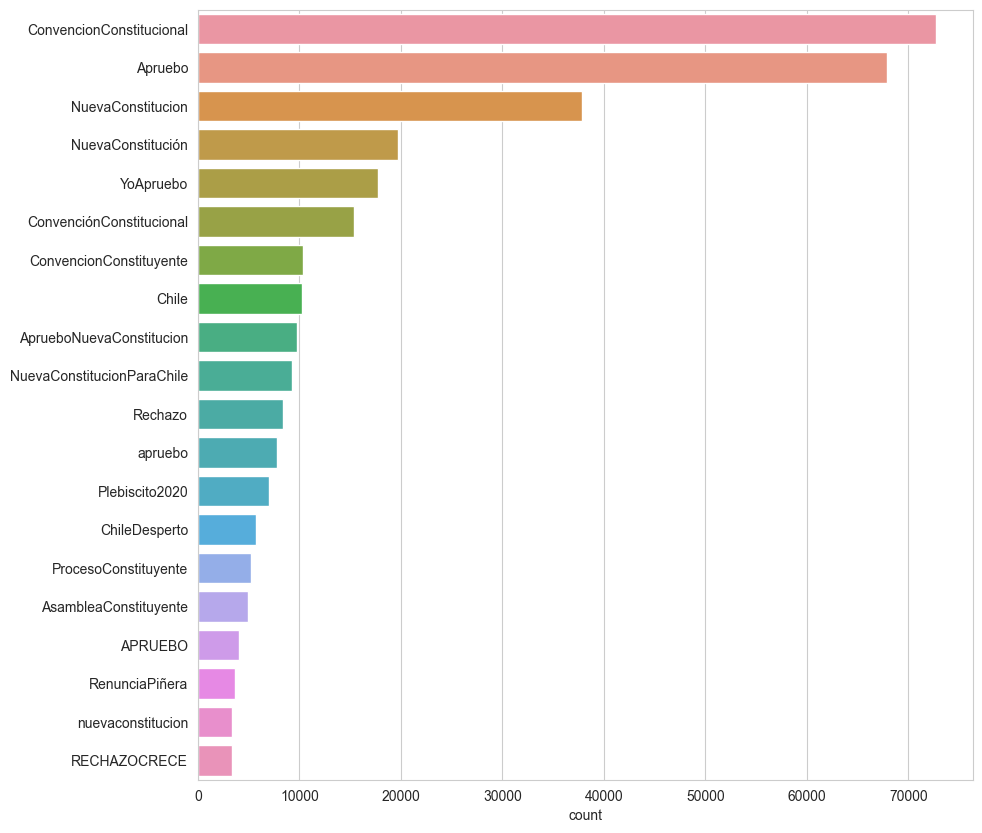

In [37]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.countplot(y=total_hashtags, order=total_hashtags.value_counts()[:20].index, ax=ax)
plt.show()